## Revisiting Linear Regression — Now with PyTorch

In this section, we will **repeat the same simple linear regression problem** we tackled earlier — but now, we’ll implement it using **PyTorch**.

Instead of NumPy, we’ll use PyTorch’s built-in functionality to define tensors, compute gradients, and update parameters. This helps us build a better foundation for scaling to neural networks later.

## What is PyTorch?

[**PyTorch**](https://pytorch.org/) is an **open-source machine learning library** developed by **Facebook's AI Research lab (FAIR)** and released in **January 2017**. It has quickly become one of the most popular deep learning frameworks, especially favored in **research and academia** due to its flexibility and ease of use.


## Dynamic Computation Graphs

One of PyTorch’s most powerful features is its **dynamic computation graph**.

Unlike older frameworks that build static graphs (e.g., TensorFlow v1), PyTorch builds the graph **as you go** — line by line during the forward pass.

This means:
- Easy debugging with native Python control flow
- Flexibility to write custom models quickly
- Great for research and prototyping

---

## What is a Tensor?

A **tensor** is the core data structure in PyTorch — it’s essentially a **generalized NumPy array** that also supports **automatic differentiation** and can be run on **GPUs**.

| Type   | Dimensions | Example                          |
|--------|------------|----------------------------------|
| Scalar | 0D         | `torch.tensor(3.14)`             |
| Vector | 1D         | `torch.tensor([1, 2, 3])`        |
| Matrix | 2D         | `torch.ones((2, 3))`             |
| Tensor | 3D+        | `torch.randn((2, 3, 4))`         |

You can seamlessly convert between NumPy and PyTorch:
```python
tensor.numpy()         # Convert PyTorch → NumPy
torch.from_numpy(arr)  # Convert NumPy → PyTorch


## Checking CUDA Devices in PyTorch

PyTorch makes it easy to check for available **CUDA-compatible GPUs** (i.e., NVIDIA GPUs) using its `torch.cuda` module. This is helpful when you want to **run models on GPU** instead of CPU for faster computation.

Here's what the code does:

```python
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))


In [1]:
import torch
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

NVIDIA GeForce RTX 4090 Laptop GPU


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
help(make_regression)

In [4]:
# Now we are using scikit-learn to generate the synthetic data
n_samples = 100
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.squeeze(), y_test.squeeze()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch tensors and then send them to the
# chosen device
x_train_tensor = torch.as_tensor(X_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

cuda


## Linear Regression with `nn.Linear` in PyTorch

In PyTorch, we can build a simple linear regression model for:

$$
y = wx + b
$$

using the `nn.Linear` module.

### Step 1: Import Libraries

In [ ]:
import torch.nn as nn

# Define a linear model: y = wx + b
model = nn.Linear(in_features=1, out_features=1)

for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

weight: tensor([[0.2904]])
bias: tensor([-0.7065])


## Training Loop Breakdown in PyTorch

This outlines each stage of the training loop as shown in the diagram — and how it maps to actual PyTorch code using a simple linear regression model.

### Step 1: Random Initialization of Model Parameters

```python
model = nn.Linear(in_features=1, out_features=1)
```

- PyTorch initializes the weights (`w`) and bias (`b`) randomly.
- These are the parameters that will be updated during training.


### Step 2: Forward Pass

```python
y_pred = model(X_train_scaled)
```

- This computes the model’s output (predictions) using the current values of `w` and `b`.
- Mathematically:  
  $$\hat{y} = wx + b$$


### Step 3: Computing Loss & Gradients

```python
loss = criterion(y_pred, y_train)   # Mean Squared Error
optimizer.zero_grad()               # Clear previous gradients
loss.backward()                     # Backward pass: compute gradients
```

- Compute the loss between predicted and true values.
- Backpropagation computes the gradient of the loss with respect to model parameters.


### Step 4: Updating Model Parameters

```python
optimizer.step()
```

- Applies the gradients to update the parameters:
  $$\theta = \theta - \eta \cdot \nabla_\theta L$$
- `optimizer.step()` performs the parameter update using the learning rate (`η`).

### Step 5: Repeat

```python
for epoch in range(epochs):
    ...
```

- Repeat the above steps for multiple epochs to improve the model.


Epoch  10 | Loss: 1545.8588
Epoch  20 | Loss: 1540.3574
Epoch  30 | Loss: 1536.7533
Epoch  40 | Loss: 1534.3890
Epoch  50 | Loss: 1532.8359
Epoch  60 | Loss: 1531.8145
Epoch  70 | Loss: 1531.1415
Epoch  80 | Loss: 1530.6971
Epoch  90 | Loss: 1530.4034
Epoch 100 | Loss: 1530.2089


/home/waleed/micromamba/envs/pytorch/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


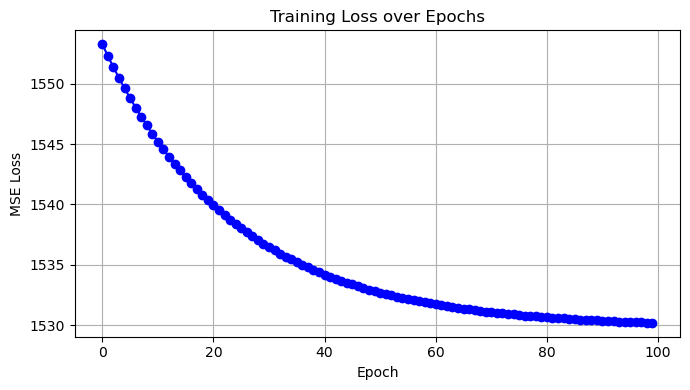


Learned parameters: w = 0.0619, b = -4.8626


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------------
# 1. Define the model
# -----------------------------------
model = nn.Linear(in_features=1, out_features=1)
# move the model to GPU
model = model.to(device=device)

# -----------------------------------
# 2. Define loss function and optimizer
# -----------------------------------
lr = 0.01
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# -----------------------------------
# 3. Training loop
# -----------------------------------
epochs = 100
loss_vals = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(x_train_tensor)

    # Compute loss
    loss = criterion(y_pred, y_train_tensor)
    loss_vals.append(loss.item())  # Save loss for visualization

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Optional: print every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f}")

# -----------------------------------
# 6. Visualize loss curve
# -----------------------------------
plt.figure(figsize=(7, 4))
plt.plot(loss_vals, '-o', color='blue')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------
# 7. Print learned parameters
# -----------------------------------
w_learned = model.weight.item()
b_learned = model.bias.item()
print(f"\nLearned parameters: w = {w_learned:.4f}, b = {b_learned:.4f}")
